In [1]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [2]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [3]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [4]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print "Actual mean is ", mu

threshold = 0.0000001
prev = 0.0
# indicate how many neighbors to look
number_of_neighbors = 250

# random choose a point
random_index = randrange(0,len(s))
# randomly initialize the mean
estimate = s[random_index]
iteration = 0
num_of_experiment = 3 # specify run the experiment how many times

for i in range(0,num_of_experiment):
    random_index = randrange(0,len(s)) # random pick a intial at the beginning every time
    estimate = s[random_index]
    iteration = 0
    print "initial estimate mean is ", estimate
    print "num of experiment is ", i
    # experiment starts
    # while less than threshold
    while abs(estimate-prev) >= threshold:
        lst = K_Nearest_Neighbor(estimate, number_of_neighbors, s)
        iteration = iteration + 1
        numerator = 0.0
        denominator = 0.0
        for i in lst:
            # apply the kernel function
            # current is from the last iteration which get the nearest neighbor
            weight = simpleKernel(estimate,i,3.0)
            numerator = numerator + weight*i
            denominator = denominator + weight
        # update mean
        prev = estimate
        estimate = numerator/denominator


    print "number of KNN ", iteration    
    print "converged mode is ", estimate

Actual mean is  7.8
mean is  6.76683436739
num of experiment  0


NameError: name 'K_Nearest_Neighbor' is not defined

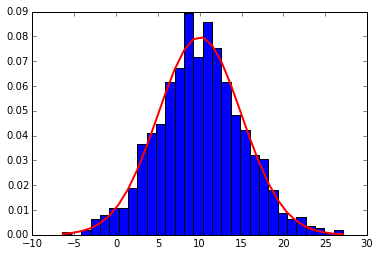

In [59]:
# graph the previous dataset
import matplotlib.pyplot as plt
s.sort()
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()